## Bag, not Bag (Hyungjoo Kim with Team "Betago"), email: hyungjoo.kim.20@ucl.ac.uk

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 

from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


## Data is given by UCL: COMP0090_Introduction_to_deep_learning

In [2]:
train_imgs = np.load('./comp0090/fashion-train-imgs.npz')     # 28, 28, 120000
train_label = np.load('./comp0090/fashion-train-labels.npz')   # 12000, 
dev_imgs = np.load('./comp0090/fashion-dev-imgs.npz')          # 28, 28, 1000
dev_label = np.load('./comp0090/fashion-dev-labels.npz')       # 1000,
test_imgs = np.load('./comp0090/fashion-test-imgs.npz')        # 28, 28, 1000
test_label = np.load('./comp0090/fashion-test-labels.npz')     # 1000, 

print(train_imgs.shape)
print(train_label.shape)
print(dev_imgs.shape)
print(dev_label.shape)
print(test_imgs.shape)
print(test_label.shape)

(28, 28, 12000)
(12000,)
(28, 28, 1000)
(1000,)
(28, 28, 1000)
(1000,)


[10122  1782  7650  9934  7924  7999   192  6728  4118  8514  5919 11631
  8179 11490   444    96   756  6988  3136  6677  4152  6690 11099  9046
  9497]
(25, 784)


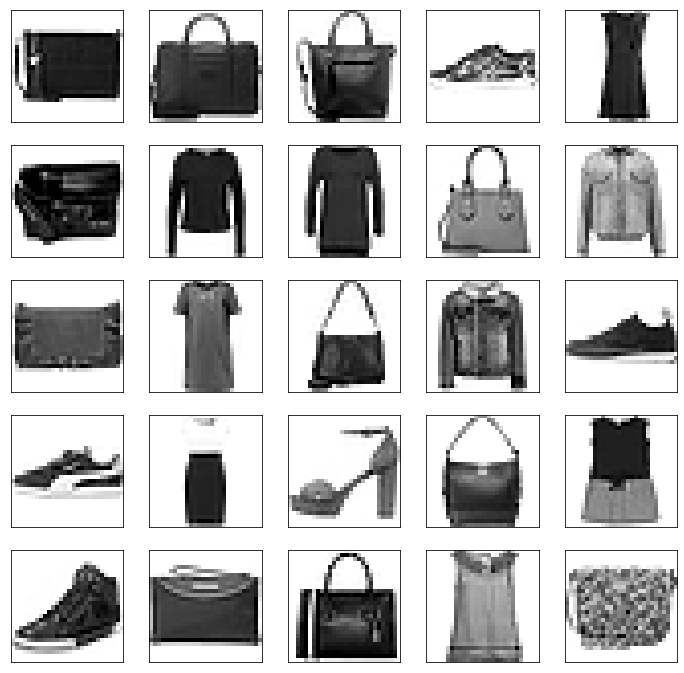

In [3]:
train_imgs_data = np.zeros((train_imgs.shape[2],train_imgs.shape[1]*train_imgs.shape[0]))
for k in range(train_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     train_imgs_data[k][index] = train_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(train_imgs_data.shape[0]), 25)
sample_images = train_imgs_data[sample_idx, :]
print(sample_idx)
print(sample_images.shape)
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

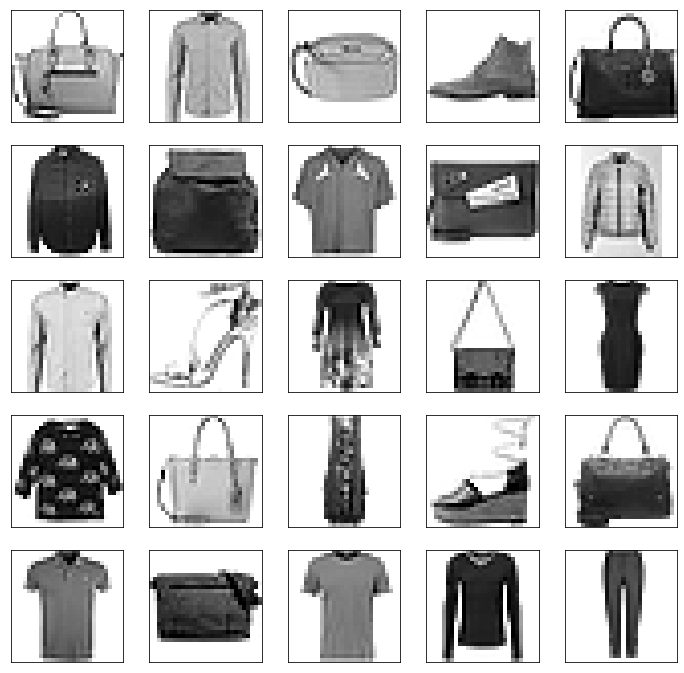

In [4]:
dev_imgs_data = np.zeros((dev_imgs.shape[2],dev_imgs.shape[1]*dev_imgs.shape[0]))
for k in range(dev_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     dev_imgs_data[k][index] = dev_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(dev_imgs_data.shape[0]), 25)
sample_images = dev_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

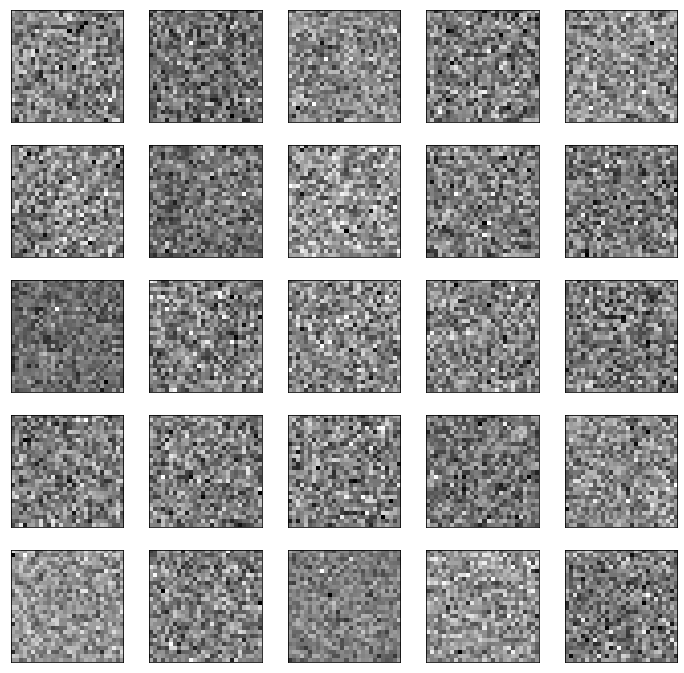

In [5]:
test_imgs_data = np.zeros((test_imgs.shape[2],test_imgs.shape[1]*test_imgs.shape[0]))
for k in range(test_imgs.shape[2]):
 index = 0;
 for j in range(28):
   for i in range(28):
     test_imgs_data[k][index] = test_imgs[j][i][k];
     index = index + 1

sample_idx = np.random.choice(np.arange(test_imgs_data.shape[0]), 25)
sample_images = test_imgs_data[sample_idx, :]
fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey=True, sharex=True, figsize=(12, 12))
for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(np.array(sample_images[5 * r + c].reshape((28, 28))).T,cmap=matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([])) 

In [6]:
# The vanilla perceptron model was implemented as shown in the code below.
def Training_Perceptron(w,b,train_imgs,train_label):
    epoch_errors=0
    for image in np.arange(len(train_label)):
        x = np.concatenate(train_imgs[:,:,image]) #Transform input matrix into vector
        y_prime = w@x + b #Calculate perceptron result
        
        if y_prime > 0: #Binarize success/failure
            y_prime = 1
        else:
            y_prime = 0
        
        if train_label[image] != y_prime: #find out if perceptron made a mistake
            epoch_errors += 1
            if train_label[image] == 1: #if incorrect prediction made, train weights and bias
                w += x
                b += 1
            else:
                w -= x
                b -= 1
        else: #if correct prediction is made, skip to next image
            continue
    loss = epoch_errors
    accuracy=(len(train_label) - epoch_errors) / (len(train_label))

    return accuracy, loss, w, b

In [7]:
def Validation_Perceptron(w,b,dev_imgs,dev_label):
    epoch_errors=0
    for image in np.arange(round(len(dev_label))):
        x = np.concatenate(dev_imgs[:, :, image]) #Transform input matrix into vector
        y_prime = w@x + b #Calculate perceptron result
        if y_prime > 0: #Binarize success/failure
            y_prime = 1
        else:
            y_prime = 0
            
        if dev_label[image] != y_prime: #find out if perceptron made a mistake
            epoch_errors+=1
        else: #if correct prediction is made, skip to next image
            continue
    
    accuracy=(len(dev_label)-epoch_errors)/(len(dev_label))
    loss=epoch_errors
    return accuracy, loss

In [8]:
#Initialise variables for perceptron
d = 28*28 #Calculate number of pixels
w = np.zeros(d)#+np.random.rand(1,28*28) #initialise weights to random number between 0 and 1
b = 0
average_accuracy_change = 1
validation_accuracy = 0
epoch = [0]
training_epoch_accuracy = [0]
training_epoch_loss = [0]
validation_epoch_accuracy = [0]
validation_epoch_loss = [0]

#Run perceptron algorithms while accuracy change of validation set classification below target
while average_accuracy_change >= 0.00005:
    training_accuracy, training_loss, w, b = Training_Perceptron(w, b, train_imgs, train_label) #train perceptron
    validation_accuracy, validation_loss = Validation_Perceptron(w, b, dev_imgs, dev_label) #evaluate trained perceptron using the validation dataset

    training_epoch_accuracy.append(training_accuracy) #update logs
    training_epoch_loss.append(training_loss)

    validation_epoch_accuracy.append(validation_accuracy)
    validation_epoch_loss.append(validation_loss)
    epoch.append(epoch[-1] + 1)
    
    if len(validation_epoch_accuracy)>6: # If at least 6 epochs, calculate the average accuracy change based on last 6 validation accuracies
        average_accuracy_change=abs(np.average([validation_epoch_accuracy[-1], validation_epoch_accuracy[-2], validation_epoch_accuracy[-3]]) - np.average([validation_epoch_accuracy[-4], validation_epoch_accuracy[-5], validation_epoch_accuracy[-6]]))

print("Training accuracy = "+str(training_accuracy))
print("Validation accuracy = "+str(validation_accuracy))

Training accuracy = 0.96525
Validation accuracy = 0.96


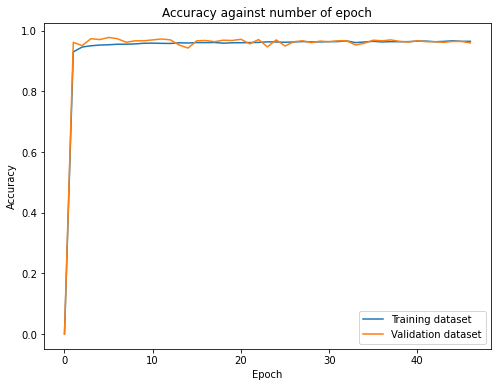

In [9]:
# The accuracy for the training and validation sets has been recorded in training epoch accuracy and validation epoch accuracy, so we can plot them with the code excerpt below.
def plot_loss_curve(logs_training, logs_validation):
    fig = plt.figure(figsize=(8, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy against number of epoch')
    plt.plot(logs_training, label = "Training dataset")
    plt.plot(logs_validation, label = "Validation dataset")
    plt.legend(["Training dataset", "Validation dataset"])
    plt.show()
plot_loss_curve(training_epoch_accuracy, validation_epoch_accuracy)

**Answer:** The final, converged accuracy on the validation dataset for the vanilla perceptron was 96%, although the maximum accuracy which occurred during the spike in the first few epochs was 97.8%. The training dataset’s accuracies were 96.7 % for the peak accuracy, and 96.5% for the converged accuracy.

In [12]:
# The loss for the training and validation sets has been recorded in history and loss val set, so we can plot them with the code excerpt below.
def sigmoid(z): #sigmoid function as activation function
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z): #The gradient of the sigmoid function
    return np.multiply(sigmoid(z), (1 - sigmoid(z)))

def cost(theta1, theta2, theta3, b1, b2, b3, X, y):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # run the feed-forward pass
    a1, z2, a2, z3, a3, z4 ,h = forward_propagate(X, theta1, theta2, theta3, b1,b2 ,b3)
    
    # compute the cost
    J = 0
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m
    
    return J

def one_hot_label(label): #change the label to one-hot format
  new_label=[]
  for i in range(label.shape[0]):
    if label[i] not in new_label:
      new_label.append(label[i])
  one_hot_encoder = np.zeros((label.shape[0],np.mat(new_label).shape[1]))
  for i in range(label.shape[0]):
    one_hot_encoder[i][label[i]] = 1
  return one_hot_encoder

train_input = train_imgs_data #train data set
train_output = one_hot_label(train_label) #train label
val_input = dev_imgs_data #validation date set
val_output = one_hot_label(dev_label) #validation label
X = train_input
Y = train_output

def forward_propagate(X, theta1, theta2, theta3,b1 ,b2 ,b3):
    m = X.shape[0]
    
    a1 = np.insert(X, 0, values=np.ones(m), axis=1) #add a bias term in the input layer
    z2 = a1 * theta1.T + b1
    a2 = np.insert(sigmoid(z2), 0, values=np.ones(m), axis=1) 
    z3 = a2 * theta2.T + b2
    a3 = np.insert(sigmoid(z3), 0, values=np.ones(m), axis=1)
    z4 = a3 * theta3.T + b3
    h = sigmoid(z4)

    return a1, z2, a2, z3, a3, z4 ,h

def backprop(theta1, theta2, theta3, b1, b2, b3, X, y):
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)

    # run the feed forward propagation and get the values of each layer
    a1, z2, a2, z3, a3, z4 ,h = forward_propagate(X, theta1, theta2, theta3,b1 ,b2 ,b3) 
    a1_val, z2_val, a2_val, z3_val, a3_val, z4_val, h_val=forward_propagate(X, theta1, theta2, theta3,b1 ,b2 ,b3) 
    
    # Inialise the gradient of each model parameters and loss J
    J = 0 #Loss 
    delta1 = np.zeros(theta1.shape) #gradient of  theta1
    delta2 = np.zeros(theta2.shape) #gradient of  theta2
    delta3 = np.zeros(theta3.shape) #gradient of  theta3

    delta_b_1 = np.zeros(b1.shape) #gradient of b1
    delta_b_2 = np.zeros(b2.shape) #gradient of b2
    delta_b_3 = np.zeros(b3.shape) #gradient of b3
    
    # compute the log-likelihood loss
    for i in range(m):
        first_term = np.multiply(-y[i,:], np.log(h[i,:]))
        second_term = np.multiply((1 - y[i,:]), np.log(1 - h[i,:]))
        J += np.sum(first_term - second_term)
    
    J = J / m

    # run backpropagation
    for t in range(m):
        a1t = a1[t,:]  #input layer
        z2t = z2[t,:]  #input layer times W1 and plus b1
        a2t = a2[t,:]  #second layer after sigmoid function from z2t
        z3t = z3[t,:]  #second layer times W2 and plus b2
        a3t = a3[t,:]  #third layer after sigmoid function from z3t

        ht = h[t,:]    #prediction
        yt = y[t,:]    #label
        
        d4t = ht - yt  #third layer difference
        z3t = np.insert(z3t, 0, values=np.ones(1))  
        d3t = np.multiply((theta3.T * d4t.T).T, sigmoid_gradient(z3t))  #second layer difference
        z2t = np.insert(z2t, 0, values=np.ones(1))  
        d2t = np.multiply((theta2.T * d3t.T[1:,:]).T, sigmoid_gradient(z2t))  #first layer difference
        #sum up the difference
        delta1 = delta1 + (d2t[:,1:]).T * a1t 
        delta2 = delta2 + (d3t[:,1:]).T * a2t
        delta3 = delta3 + d4t.T * a3t
        delta_b_1 = delta_b_1 + (d2t[:,1:])
        delta_b_2 = delta_b_2 + (d3t[:,1:])
        delta_b_3 = delta_b_3 + d4t
        
    delta1 = delta1 / m
    delta2 = delta2 / m
    delta3 = delta3 / m
    delta_b_1 = delta_b_1 / m
    delta_b_2 = delta_b_2 / m
    delta_b_3 = delta_b_3 / m
    
    return J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3, b1, b2, b3

def gradient_descent(input_size, hidSize_1, hidSize_2, num_labels, X, Y, learning_rate, max_it,val_input,train_input,train_output,val_output):
    
    checkpoint_step = int(max_it / 100) #check the progress of training
    
    best_loss = float('+inf') #set the best loss as the maximum float number
    best_theta1 = None #set the best parameters
    best_theta2 = None
    best_theta3 = None

    best_b1 = None
    best_b2 = None
    best_b3 = None
    #create an array of random term theta1, theta2, theta3
    params=(np.random.random(size = hidSize_1 * (input_size+1)+ hidSize_2*(hidSize_1+1)+num_labels*(hidSize_2+1))-0.5)*0.24
    theta1 = np.matrix(np.reshape(params[:hidSize_1*(input_size+1)],(hidSize_1, (input_size+1))))
    theta2 = np.matrix(np.reshape(params[hidSize_1*(input_size+1):hidSize_2*(hidSize_1+1)+hidSize_1*(input_size+1)],(hidSize_2, (hidSize_1+1))))
    theta3 = np.matrix(np.reshape(params[hidSize_2*(hidSize_1+1)+hidSize_1*(input_size+1):],(num_labels, (hidSize_2+1))))
    #create an array of random term b1, b2, b3
    paramsB=(np.random.random(size = hidSize_1  + hidSize_2  + num_labels )-0.5)*0.24
    b1 = np.matrix(np.reshape(paramsB[:hidSize_1 ],(1, (hidSize_1))))
    b2 = np.matrix(np.reshape(paramsB[hidSize_1 : hidSize_1 + hidSize_2 ],(1, (hidSize_2))))
    b3 = np.matrix(np.reshape(paramsB[hidSize_1 + hidSize_2 : ],(1, (num_labels))))

    loss_train_set = [] #record the loss 
    loss_val_set =[]
    history=[]
    accuracy_train_set = [] #record the accuracy of prediction on training set
    accuracy_val_set = [] #record the accuracy of prediction on validation set
    for it in range(max_it): #repeat for preset number of iterations
        #do the backward propagation
        J, delta1, delta2, delta3, delta_b_1, delta_b_2, delta_b_3, theta1, theta2, theta3,b1,b2,b3 = backprop(theta1, theta2, theta3, b1, b2, b3, X, Y)
        J_val = cost(theta1, theta2, theta3, b1, b2, b3, val_input, val_output)
        if J < best_loss: #if loss is smaller than the lowest loss, record the current model parameters
            best_theta1 = theta1
            best_theta2 = theta2
            best_theta3 = theta3

            best_b1 = b1
            best_b2 = b2
            best_b3 = b3
        #gradient descent
        #update the model parameters by subtracting learning rate multiplied by gradient of the model parameter
        theta1 = theta1 - learning_rate * delta1
        theta2 = theta2 - learning_rate * delta2
        theta3 = theta3 - learning_rate * delta3

        b1 = b1 - learning_rate * delta_b_1
        b2 = b2 - learning_rate * delta_b_2
        b3 = b3 - learning_rate * delta_b_3
        
        #use forward propagation to get the prediction in train and validation set with current model parameters
        h_val = forward_propagate(val_input,theta1,theta2,theta3,b1,b2,b3)[6]
        h_train = forward_propagate(train_input,theta1,theta2,theta3,b1,b2,b3)[6]
        #change the prediction to one hot format
        prediction_val = change_to_onehot(np.argmax(h_val,axis=1),2)
        prediction_train = change_to_onehot(np.argmax(h_train,axis=1),2)
        #recored the accuracy of the prediciton in train and validation set
        accuracy_val = accuracy_score(val_output, prediction_val)
        accuracy_train = accuracy_score(train_output, prediction_train)

        
        loss_train_set.append(J) #record the loss 
        loss_val_set.append(J_val)
        history.append(J) #record the loss 
        accuracy_val_set.append(accuracy_val)#record the accuracy in validation set
        accuracy_train_set.append(accuracy_train) #record the accuracy in train set 
            
        if (it + 1) % checkpoint_step == 0:
            print('[{:05}] current loss on train set is: {}'.format(it+1, J)) #present the progress of training
            print('[{:05}] current loss on validation set is: {}'.format(it+1, J_val)) #present the progress of training
    
    return history, best_theta1,best_theta2,best_theta3,best_theta1,best_theta2,best_theta3,best_b1,best_b2,best_b3,accuracy_val_set,accuracy_train_set,loss_val_set

In [13]:
def change_to_onehot(prediction,num_labels):
  one_hot = np.zeros((prediction.shape[0],num_labels))
  parameter = one_hot.shape[0]
  for i in range(parameter):
    if prediction[i] == 0:
      one_hot[i][0] = 1
      one_hot[i][1] = 0
    else:
      one_hot[i][0] = 0
      one_hot[i][1] = 1
  return one_hot
  
def Show_Performance(testLabel,test_result):
  print("The accuracy is measured as {}".format(accuracy_score(testLabel, test_result)))  
  print("The precision is measured as {}".format(precision_score(testLabel, test_result, average='weighted')))
  print("The recall is measured as {}".format(recall_score(testLabel, test_result, average='weighted')))

input_size = 784 #input size, which is the number of pixels in the graph
hidSize_1 = 50 #hiden size of the first layer 
hidSize_2 = 30 #hiden size of the second layer
num_labels = 2 #number of labels in the output
learning_rate = 0.7 #set the learning rate
max_it = 800 #set the number of iterations

history, best_theta1,best_theta2,best_theta3,best_theta1,best_theta2,best_theta3,best_b1,best_b2,best_b3,accuracy_val_set,accuracy_train_set, loss_val_set= gradient_descent(input_size, hidSize_1, hidSize_2, num_labels, X, Y, learning_rate, max_it,val_input,train_input,train_output,val_output)

[00008] current loss on train set is: 1.385099300593127
[00008] current loss on validation set is: 1.3851807477877012
[00016] current loss on train set is: 1.3812982010376942
[00016] current loss on validation set is: 1.381109168978306
[00024] current loss on train set is: 1.3742120434465375
[00024] current loss on validation set is: 1.3738487423484442
[00032] current loss on train set is: 1.3571766486022727
[00032] current loss on validation set is: 1.3564374250105549
[00040] current loss on train set is: 1.3080147235104362
[00040] current loss on validation set is: 1.306312714126325
[00048] current loss on train set is: 1.1537326896762015
[00048] current loss on validation set is: 1.1491266512519787
[00056] current loss on train set is: 0.8463924696698066
[00056] current loss on validation set is: 0.8325714697668651
[00064] current loss on train set is: 0.571205628686866
[00064] current loss on validation set is: 0.5460664336834492
[00072] current loss on train set is: 0.981938476855

[00560] current loss on train set is: 0.12712060882782925
[00560] current loss on validation set is: 0.11199879190477272
[00568] current loss on train set is: 0.12586602194541946
[00568] current loss on validation set is: 0.11137721853294222
[00576] current loss on train set is: 0.12462410387136132
[00576] current loss on validation set is: 0.11077726552075189
[00584] current loss on train set is: 0.12339475770554088
[00584] current loss on validation set is: 0.1102013494350507
[00592] current loss on train set is: 0.12218417429954417
[00592] current loss on validation set is: 0.10970973677728517
[00600] current loss on train set is: 0.12339520523732979
[00600] current loss on validation set is: 0.11279613320601313
[00608] current loss on train set is: 1.2138077592011556
[00608] current loss on validation set is: 1.1558220708302527
[00616] current loss on train set is: 0.22665675439333752
[00616] current loss on validation set is: 0.2162863168882542
[00624] current loss on train set is

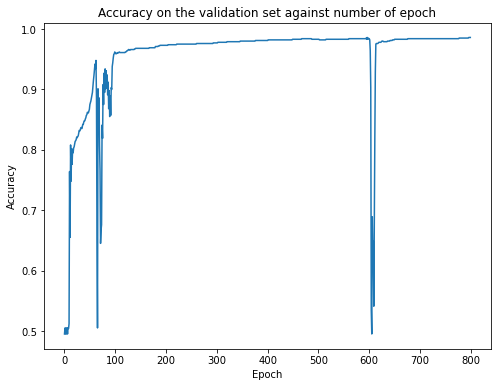

In [14]:
# The accuracy for the training and validation sets has been recorded in accuracy train set and accuracy val set, so we can plot them with the code excerpt below.
def plot_accuracy_val_set_curve(logs):
    fig = plt.figure(figsize = (8, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the validation set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_accuracy_val_set_curve(accuracy_val_set)

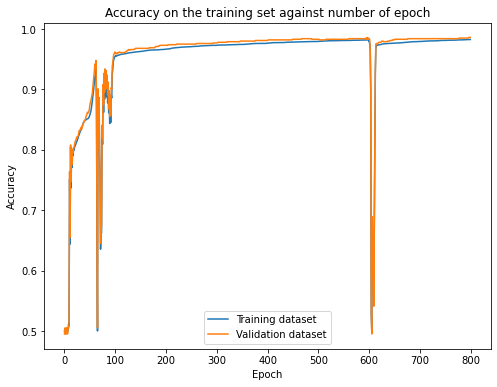

In [15]:
def plot_accuracy_train_set_curve(logs_training, logs_validation):
    fig = plt.figure(figsize = (8, 6))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.title('Accuracy on the training set against number of epoch')
    plt.plot(logs_training, label = "Training dataset")
    plt.plot(logs_validation, label = "Validation dataset")
    plt.legend(["Training dataset" , "Validation dataset"])
    plt.show()
plot_accuracy_train_set_curve(accuracy_train_set, accuracy_val_set)

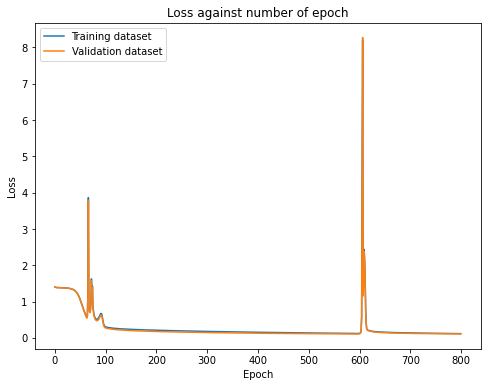

In [16]:
def plot_loss_curve(logs_training, logs_validation):
    fig = plt.figure(figsize = (8, 6))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Loss against number of epoch')
    plt.plot(logs_training, label = "Training dataset")
    plt.plot(logs_validation, label = "Validation dataset")
    plt.legend(["Training dataset" , "Validation dataset"])
    plt.show()
plot_loss_curve(history, loss_val_set)

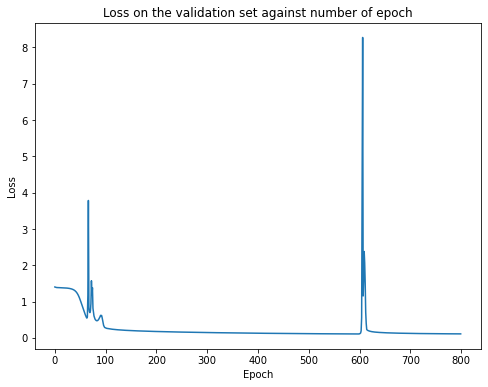

In [17]:
def plot_loss_curve_validation(logs):
    fig = plt.figure(figsize = (8, 6))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title('Loss on the validation set against number of epoch')
    plt.plot(logs)
    plt.show()
plot_loss_curve_validation(loss_val_set)

In [18]:
h = forward_propagate(val_input, best_theta1, best_theta2, best_theta3, best_b1, best_b2, best_b3)[6]
prediction = np.argmax(h, axis = 1)

h_train = forward_propagate(train_input, best_theta1, best_theta2, best_theta3, best_b1, best_b2, best_b3)[6]
prediction_train = np.argmax(h_train, axis = 1)
prediction_train = change_to_onehot(prediction_train, 2) #change the prediction result to one hot label
print("The accuracy in the train set is measured as {}".format(accuracy_score(train_output, prediction_train))) 
print("The max accuracy for training dataset was " +str(max(accuracy_train_set)))
#print(accuracy_train_set)
#print(len(accuracy_val_set))
print("The max accuracy for validation dataset was " +str(max(accuracy_val_set))) 

The accuracy in the train set is measured as 0.9825833333333334
The max accuracy for training dataset was 0.9825833333333334
The max accuracy for validation dataset was 0.986


In [19]:
h_val = forward_propagate(val_input, best_theta1, best_theta2, best_theta3, best_b1, best_b2, best_b3)[6]
prediction_val = np.argmax(h_val, axis = 1)
prediction_val = change_to_onehot(prediction_val, 2) #change the prediction result to one hot label
print("The accuracy in the validation set is measured as {}".format(accuracy_score(val_output, prediction_val))) 

The accuracy in the validation set is measured as 0.986
